Load in the MNIST dataset and establish our feature vector (x) and our label vector (y).

In [6]:
#Nneed these depending on user 
%pip install pot
%pip install numpy
%pip install matplotlib
%pip install pandas
import ot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.datasets import fetch_openml
import numpy as np

#Load data in
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=int)

#Pick only 5000
np.random.seed(0)
indices = np.random.choice(len(X), 5000, replace=False) 
X_subset = X[indices]
y_subset = y[indices]

#See what arrays look like
print("X_subset shape:", X_subset.shape)
print("y_subset shape:", y_subset.shape)
print(X_subset[0])
print(y_subset[0])



X_subset shape: (5000, 784)
y_subset shape: (5000,)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  89.
 147. 147. 249. 230.  59.   2.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  15. 160. 249.
 254. 254. 254. 254. 254. 122.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   8. 188. 254. 254.
 254. 250. 147. 166. 253.

In [8]:
#More visualization - Not important to project
'''import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_subset[i].reshape(28, 28), cmap='gray')
    plt.title(int(y_subset[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()
'''

"import matplotlib.pyplot as plt\n\nplt.figure(figsize=(6,6))\nfor i in range(9):\n    plt.subplot(3,3,i+1)\n    plt.imshow(X_subset[i].reshape(28, 28), cmap='gray')\n    plt.title(int(y_subset[i]))\n    plt.axis('off')\nplt.tight_layout()\nplt.show()\n"

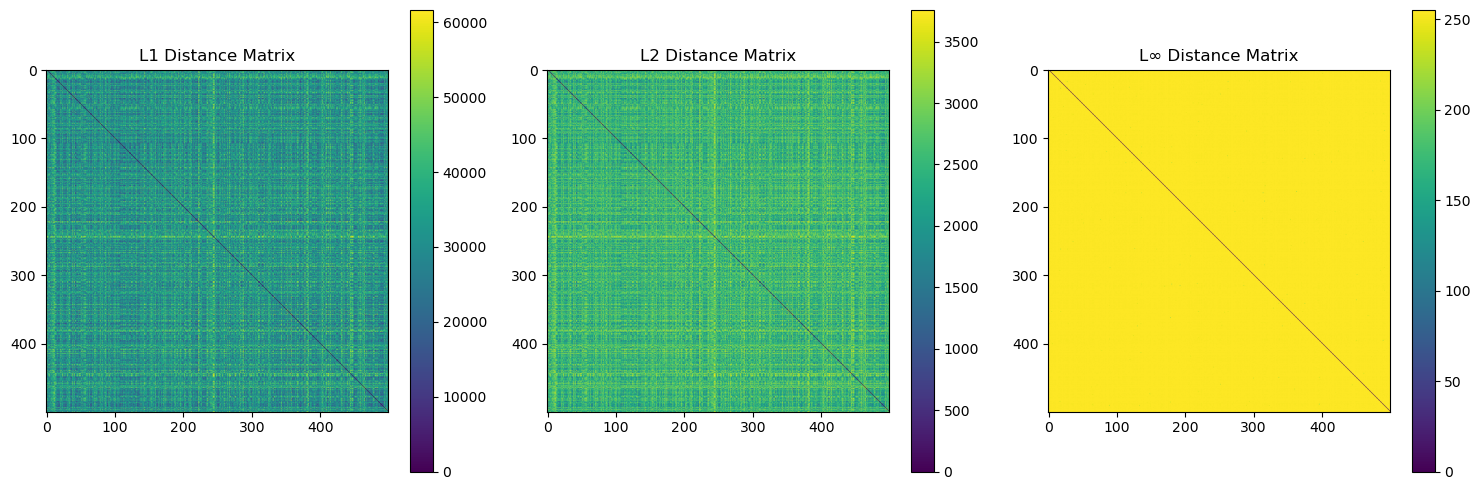

'\n# Print some statistics about the distances\nprint("ℓ₁ distances - Mean:", np.mean(l1_distances), "Max:", np.max(l1_distances))\nprint("ℓ₂ distances - Mean:", np.mean(l2_distances), "Max:", np.max(l2_distances))\nprint("ℓ∞ distances - Mean:", np.mean(linf_distances), "Max:", np.max(linf_distances))\n'

In [9]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Sort indices based on labels
sorted_indices = np.argsort(y_subset)
X_sorted = X_subset[sorted_indices]

# Calculate pairwise distances using different norms
l1_distances = cdist(X_sorted[:500], X_sorted[:500], metric='cityblock')  # L1 norm
l2_distances = cdist(X_sorted[:500], X_sorted[:500], metric='euclidean')  # L2 norm
linf_distances = cdist(X_sorted[:500], X_sorted[:500], metric='chebyshev')  # L infinity norm

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot heatmaps
im1 = ax1.imshow(l1_distances, cmap='viridis')
im2 = ax2.imshow(l2_distances, cmap='viridis')
im3 = ax3.imshow(linf_distances, cmap='viridis')

# Add titles and colorbars
ax1.set_title('L1 Distance Matrix')
ax2.set_title('L2 Distance Matrix')
ax3.set_title('L∞ Distance Matrix')

plt.colorbar(im1, ax=ax1)
plt.colorbar(im2, ax=ax2)
plt.colorbar(im3, ax=ax3)

plt.tight_layout()
plt.show()

'''
# Print some statistics about the distances
print("ℓ₁ distances - Mean:", np.mean(l1_distances), "Max:", np.max(l1_distances))
print("ℓ₂ distances - Mean:", np.mean(l2_distances), "Max:", np.max(l2_distances))
print("ℓ∞ distances - Mean:", np.mean(linf_distances), "Max:", np.max(linf_distances))
'''

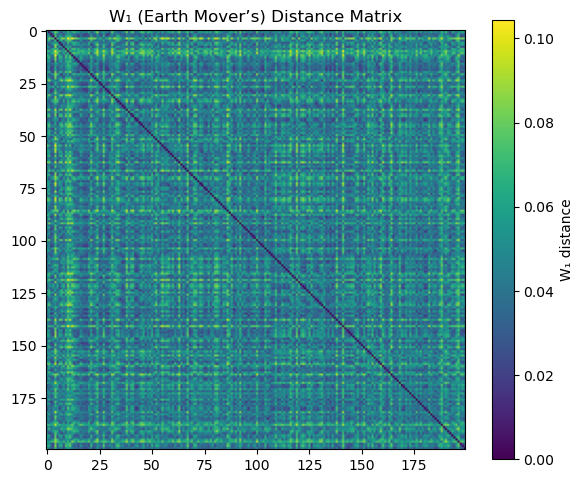

W₁ distances — Mean: 0.046519257  Max: 0.10430791


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Use the same sorted images you already created earlier:
#   X_sorted = X_subset[sorted_indices]
# Choose how many images to use (500 can be slow; start with 150–300)
N = 200
imgs = X_sorted[:N].reshape(N, 28, 28).astype(np.float32)

# 1) Binarize and normalize each image to a probability distribution
threshold = 80.0
binary = (imgs > threshold).astype(np.float32)
a = binary.reshape(N, -1)                        # shape: (N, 784)
a_sum = a.sum(axis=1, keepdims=True)
a = a / (a_sum + 1e-8)                           # avoid divide-by-zero for blank digits

# 2) Build the ground-cost matrix over pixel locations (Euclidean on the grid)
h, w = 28, 28
yy, xx = np.meshgrid(np.arange(h, dtype=np.float32), np.arange(w, dtype=np.float32), indexing='ij')
coords = np.stack([yy.ravel(), xx.ravel()], axis=1)   # shape: (784, 2)
M = ot.dist(coords, coords, metric='euclidean').astype(np.float32)  # shape: (784, 784)
M /= M.max() + 1e-8  # optional normalization for numeric stability

# 3) Pairwise W1 computations (parallelized over the upper triangle)
def w1_pair(i, j):
    # Exact EMD (W1) using linear programming:
    return float(ot.emd2(a[i], a[j], M))
    # If you need speed, use entropic Sinkhorn approximation instead (uncomment):
    # return float(ot.sinkhorn2(a[i], a[j], M, reg=5e-2, numItermax=1000)[0])

pairs = [(i, j) for i in range(N) for j in range(i, N)]
vals = Parallel(n_jobs=-1, prefer="threads")(delayed(w1_pair)(i, j) for (i, j) in pairs)

W1 = np.zeros((N, N), dtype=np.float32)
for v, (i, j) in zip(vals, pairs):
    W1[i, j] = v
    W1[j, i] = v

# 4) Visualize and summarize
plt.figure(figsize=(6, 5))
plt.imshow(W1, cmap='viridis')
plt.title('W₁ (Earth Mover’s) Distance Matrix')
plt.colorbar(label='W₁ distance')
plt.tight_layout()
plt.show()

print("W₁ distances — Mean:", np.mean(W1), " Max:", np.max(W1))
